**Часть 1: получение и анализ данных**

#### Библиотеки

In [ ]:
import pandas as pd
import numpy as np
import math
import random

import yfinance as yf

import datetime
from datetime import datetime

from copy import copy, deepcopy

import sys
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
import scipy.stats as stats
from scipy.stats import norm, skewnorm, gennorm, t, nct, genpareto, genextreme, genhyperbolic, chi2, ncx2
from scipy.stats import skew, kurtosis, goodness_of_fit

In [ ]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
from data_analysis import FinancialInstrument

# Сбор данных

https://www.finam.ru/quote/moex/moex/

https://bcs-express.ru/kotirovki-i-grafiki/imoex

https://search.yahoo.com/search?p=RUB%253DX&fr=uh3_finance_vert&fr2=p:finvsrp,m:sb


Выбранные показатели:
- индекс IMOEX
- курс доллара USD/RUB и курс евро EUR/RUB
- акции Сбербанка и Аэрофлота

In [ ]:
# Выбор периода
start_date = '2012-01-01'
end_date = '2023-12-31'

# Выбор тикеров
# S&P 500 ~ GSPC
# NASDAQ
# BCOMCO
# РТС ~ RTSI
tickers_list = ['IMOEX.ME',
                'EURRUB=X', 'USDRUB=X',
                'SBER.ME', 'AFLT.ME', 'GAZP.ME']
print(f'Кол-во выбранных тикеров - {len(tickers_list)}')

rename_columns = {'IMOEX.ME':'IMOEX',
        'EURRUB=X':'EUR/RUB', 'USDRUB=X':'USD/RUB',
        'SBER.ME':'Сбербанк', 'VTBR.ME':'ВТБ',
        'YNDX.ME':'Яндекс', 'AFLT.ME':'Аэрофлот', 'MTSS.ME':'МТС', 'FIVE.ME':'X5 Group',
        'LKOH.ME':'Лукойл', 'GAZP.ME':'Газпром', 'ROSN.ME':'Роснефть',
        'MSFT':'Microsoft'}

# adjusted close prices
price_column = 'Adj Close'

Кол-во выбранных тикеров - 6


In [ ]:
df_price = yf.download(tickers = tickers_list,
                        start = start_date,
                        end = end_date,
                        interval = '1d')[price_column]

df_price.index = pd.to_datetime(df_price.index, format='%Y-%m-%d')
df_price.sort_index(inplace=True)

df_price.rename(columns=rename_columns, inplace=True)

[*********************100%%**********************]  6 of 6 completed


In [ ]:
df_price.shape

(3130, 6)

In [ ]:
# Кол-во пропусков

df_price.isnull().sum()

Ticker
Аэрофлот    545
EUR/RUB       2
Газпром     545
IMOEX       463
Сбербанк    545
USD/RUB       4
dtype: int64

### Визуализация данных

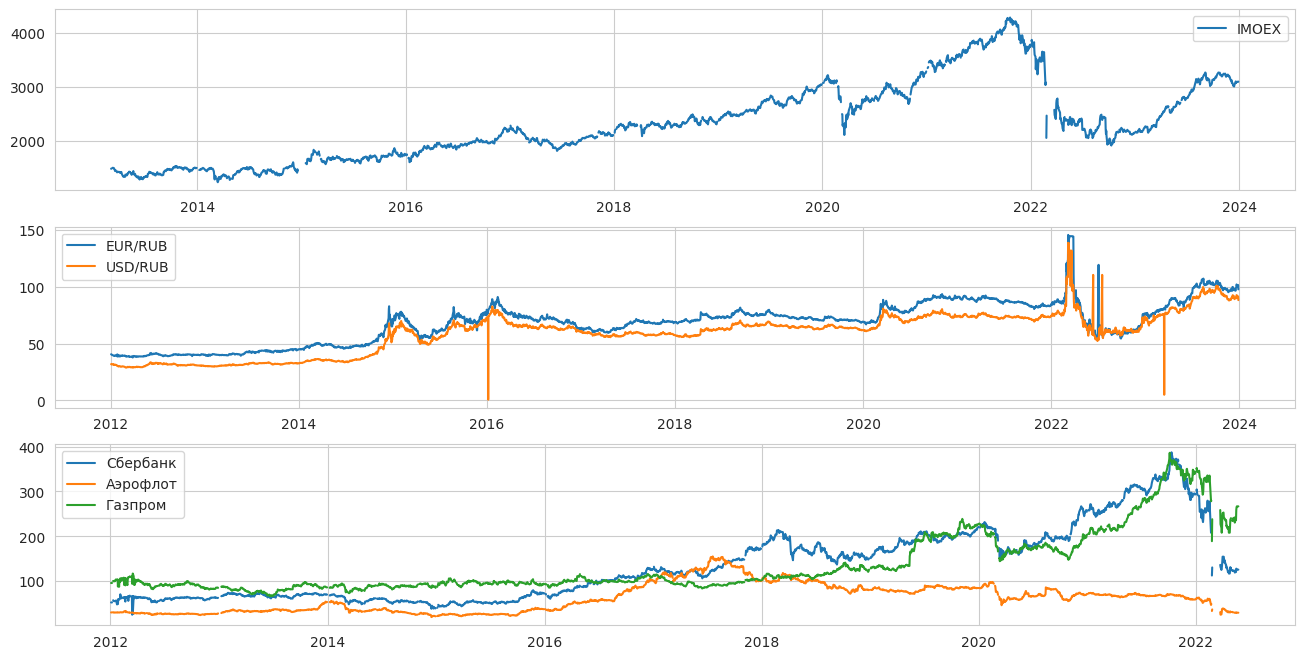

In [ ]:
fig, axs = plt.subplots(3, 1, figsize = (16, 8))
for col in ['IMOEX']:
    axs[0].plot(df_price[col], label = col)
axs[0].legend()
for col in ['EUR/RUB', 'USD/RUB']:
    axs[1].plot(df_price[col], label = col)
axs[1].legend()
for col in ['Сбербанк', 'Аэрофлот', 'Газпром']:
    axs[2].plot(df_price[col], label = col)
axs[2].legend()
plt.show()

### Корреляция

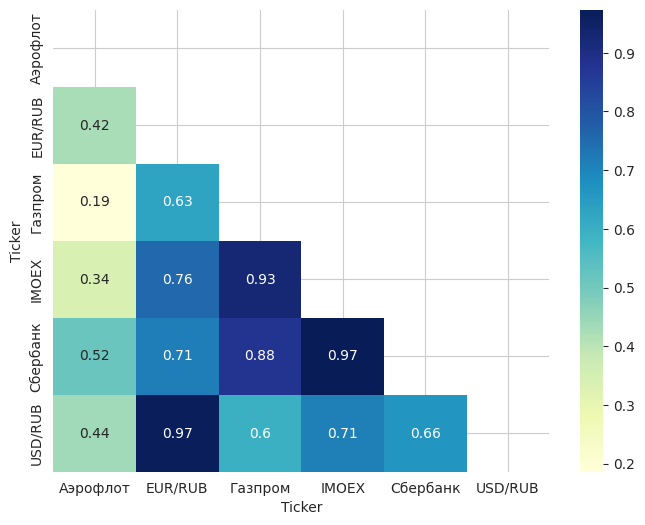

In [ ]:
corr_matrix = df_price.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, axs = plt.subplots(1, 1, figsize = (8, 6))
sns.heatmap(corr_matrix, mask=mask, cmap="YlGnBu", annot=True, ax=axs)
plt.show()

# Анализ данных

### Индекс IMOEX

In [ ]:
imoex = FinancialInstrument(df=df_price, name='IMOEX')

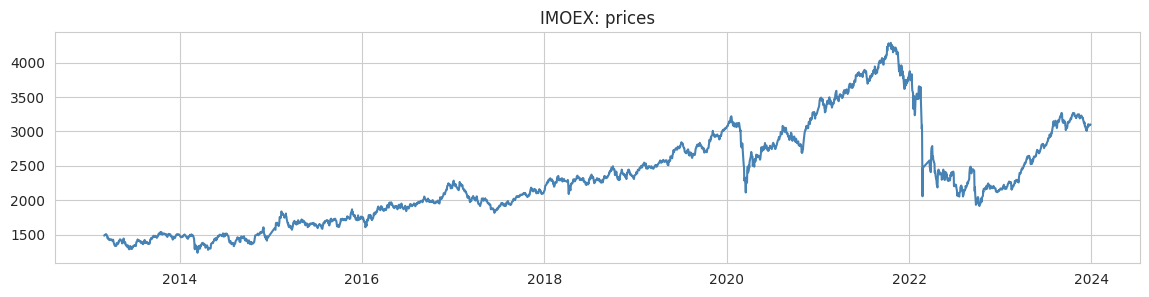

In [ ]:
imoex.price_dynamics()

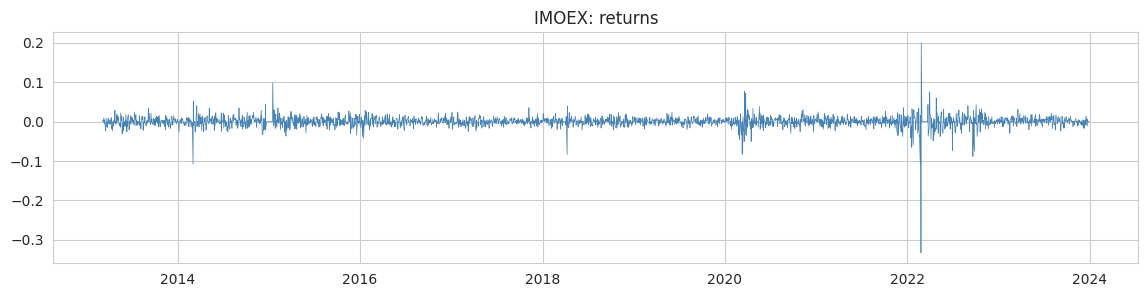

In [ ]:
imoex.returns_dynamics()

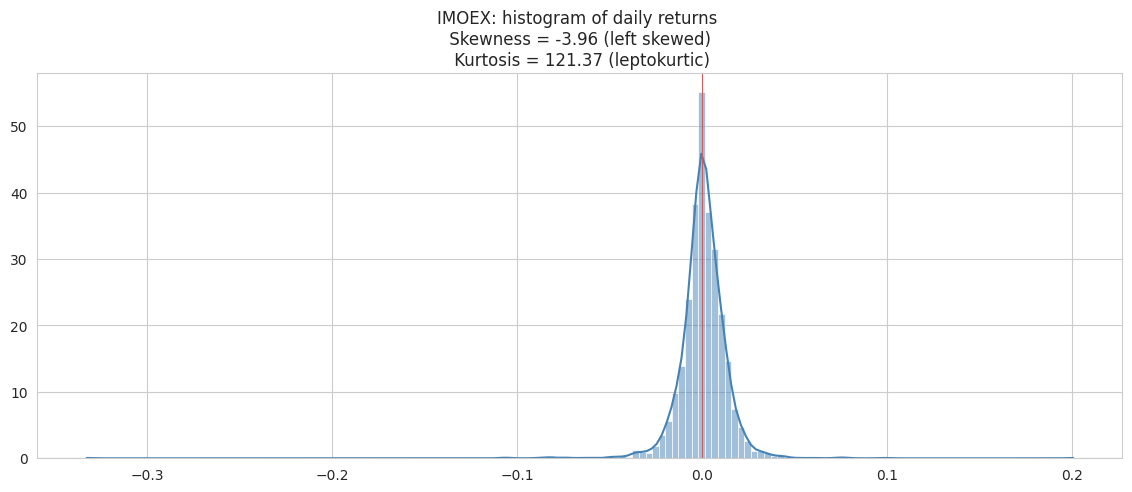

In [ ]:
imoex.histogram(bins=150)

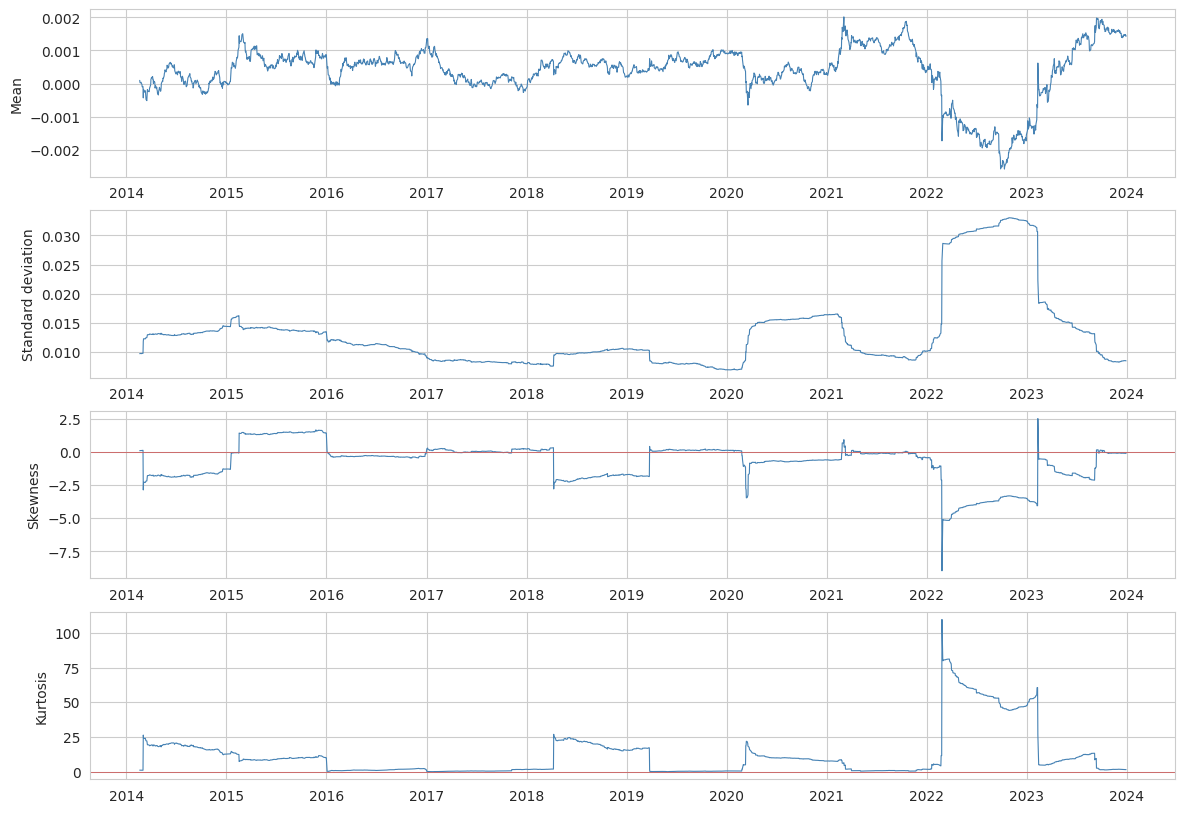

In [ ]:
imoex.get_moving_dynamic(window_size=250)

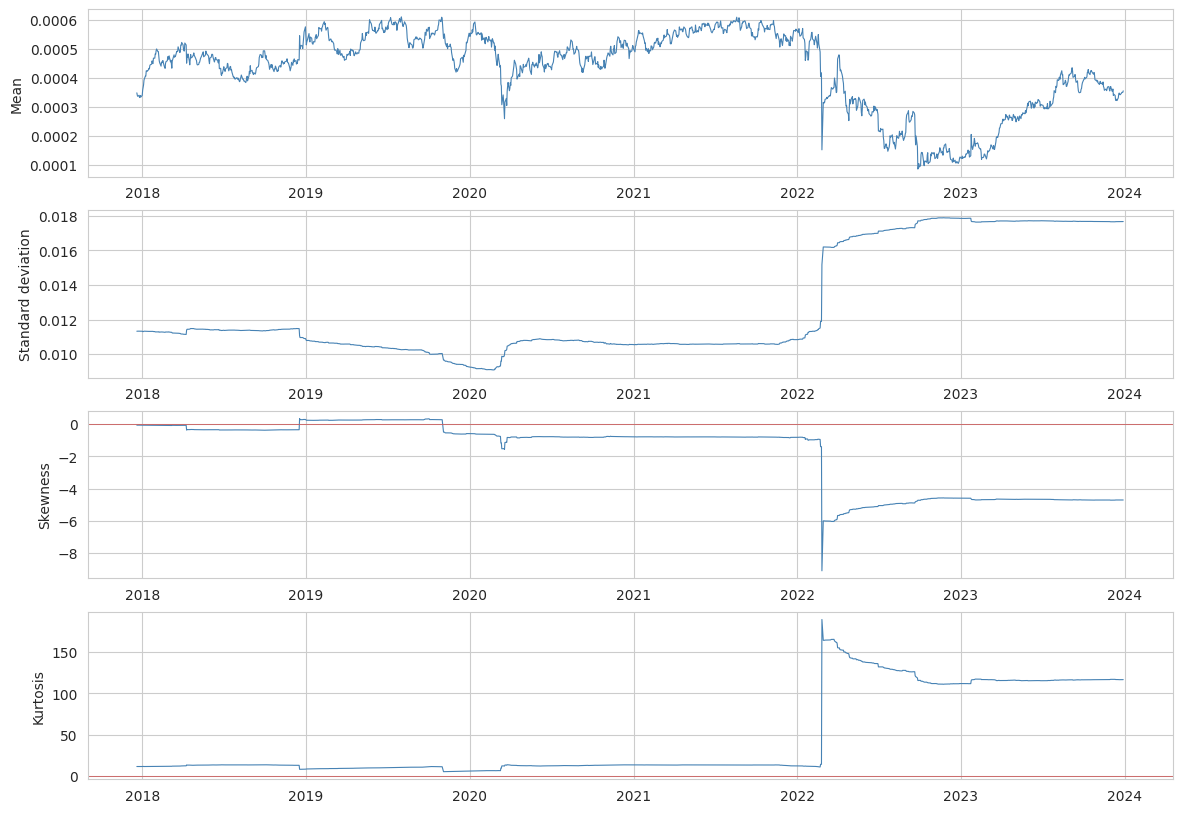

In [ ]:
imoex.get_moving_dynamic(window_size=1250)

In [ ]:
warnings.filterwarnings("ignore")

imoex.stationarity_test()

Stationarity test
ADF test: the series is stationary.
KPSS test: the series is stationary.


In [ ]:
imoex.ljungbox_test()

Ljung-Box test 
         lb_stat     lb_pvalue comment
1     21.141317  4.266299e-06        
5     32.826054  4.074886e-06        
25    76.993492  3.350789e-07        
50   117.641306  2.240803e-07        
250  388.713610  4.282374e-08        


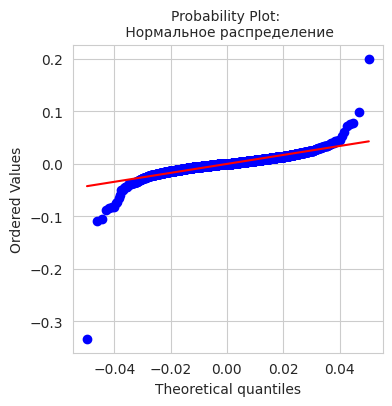

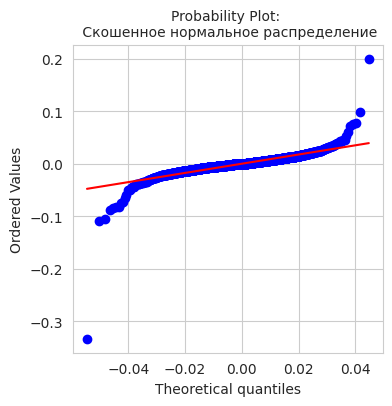

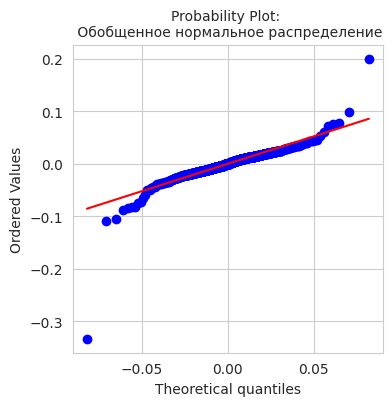

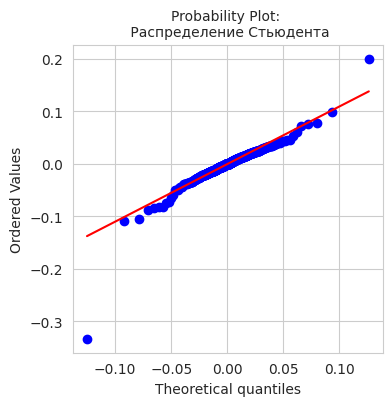

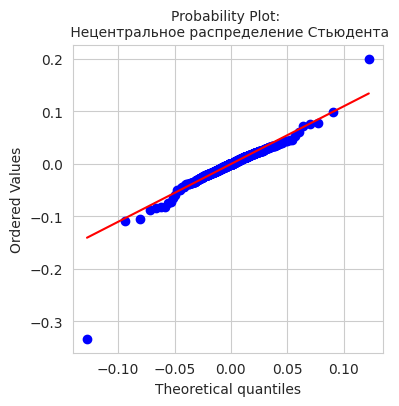

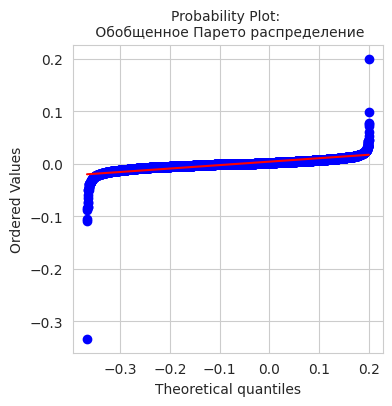

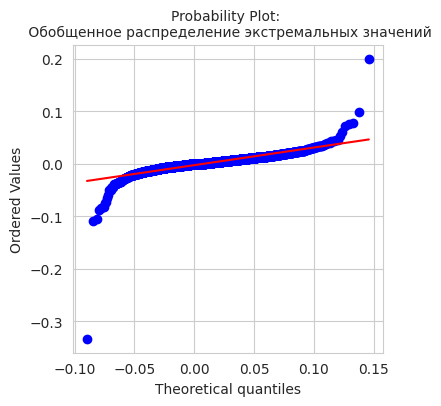

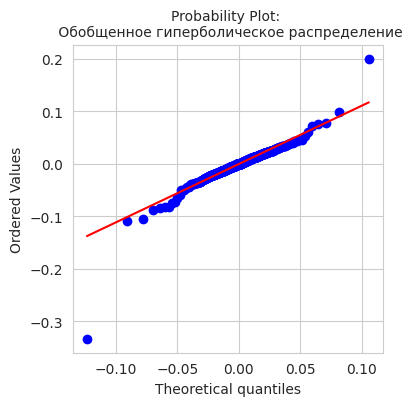

In [ ]:
imoex.qq_plot()

In [ ]:
imoex.goodness_of_fit_test(dist_list=['norm', 'GGD', 't', 'GHYP'])

Goodness-of-Fit test
Нормальное распределение: p_value = 0.0001


Обобщенное нормальное распределение: p_value = 0.0001


Распределение Стьюдента: p_value = 0.0014




### Курс доллара

In [ ]:
dollar = FinancialInstrument(df=df_price, name='USD/RUB')

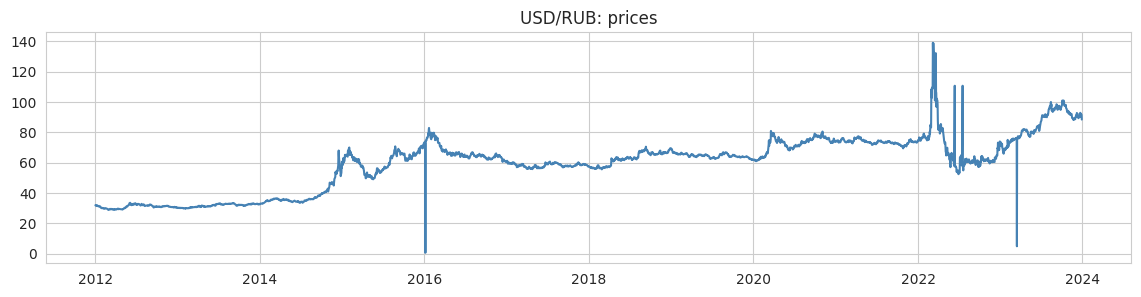

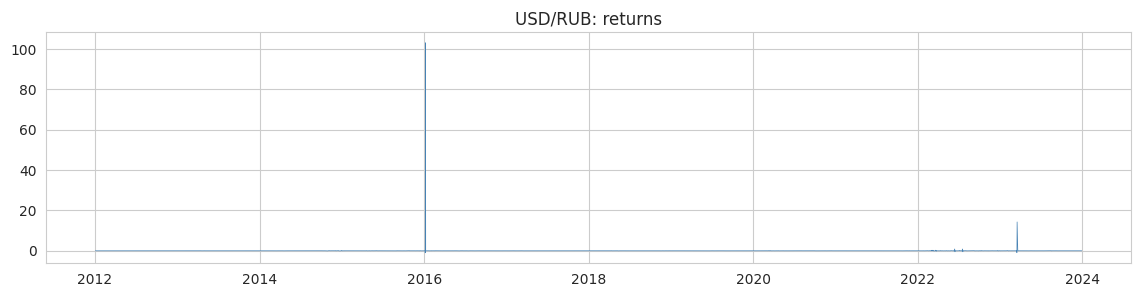

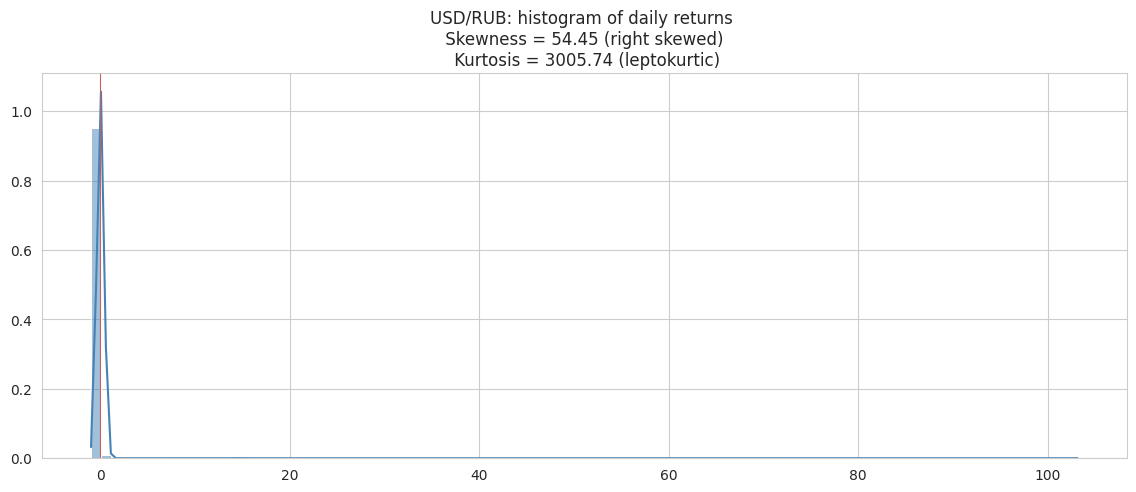

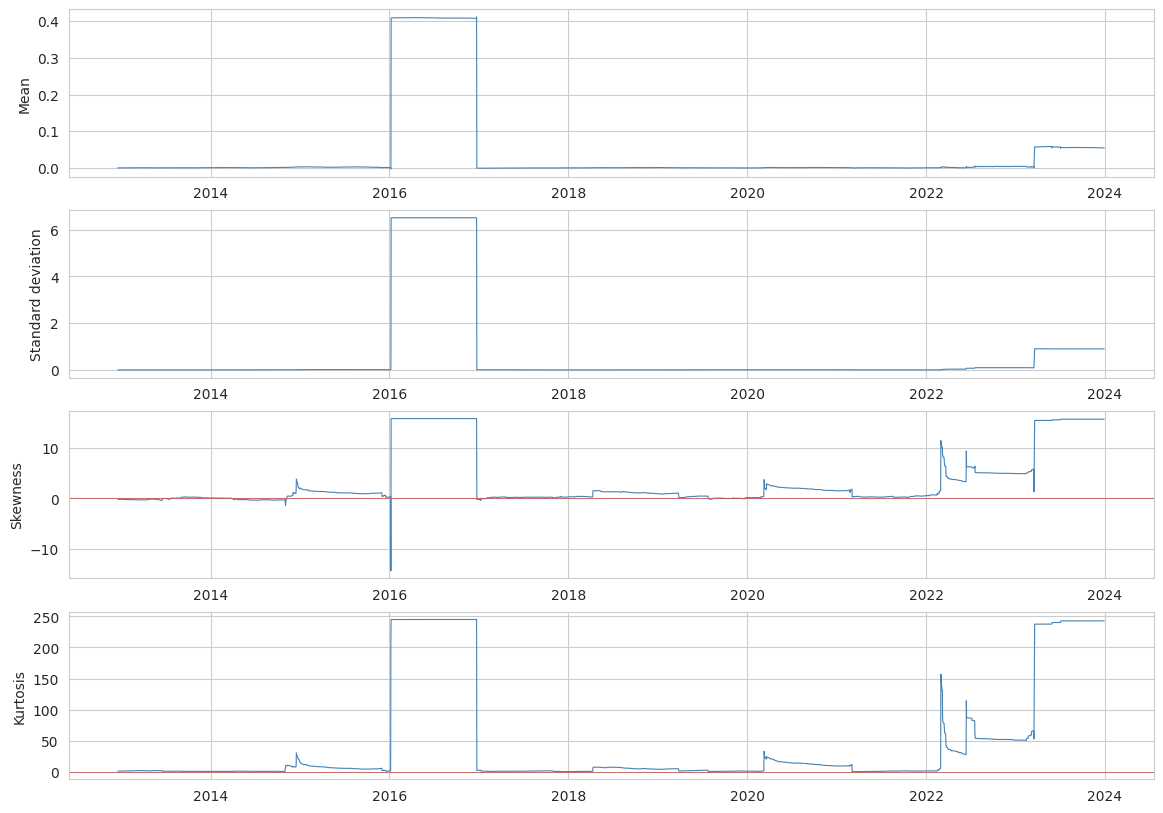



Stationarity test
ADF test: the series is stationary.
KPSS test: the series is stationary.


Ljung-Box test 
       lb_stat  lb_pvalue         comment
1    0.388648   0.533011  p_value > 0.05
5    0.390067   0.995599  p_value > 0.05
25   0.402520   1.000000  p_value > 0.05
50   0.421418   1.000000  p_value > 0.05
250  0.568969   1.000000  p_value > 0.05




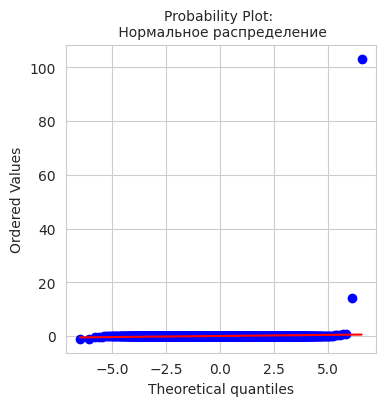

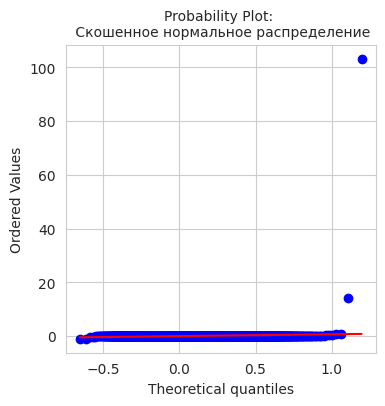

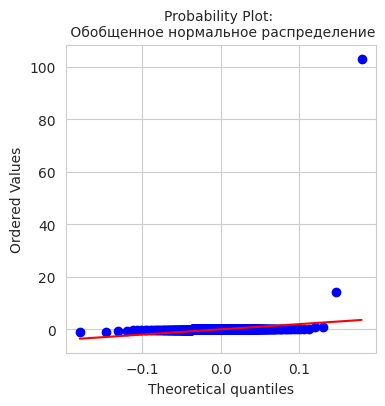

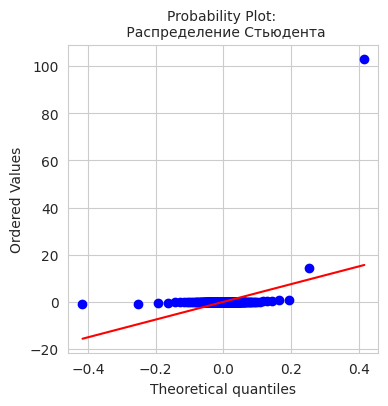

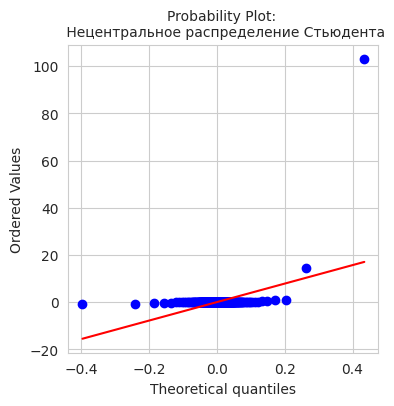

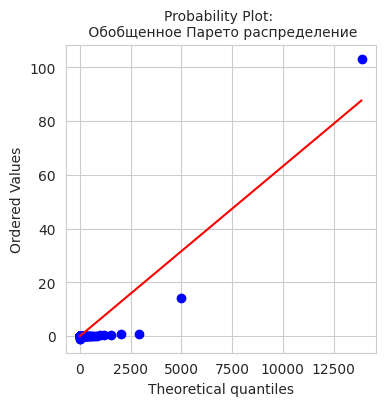

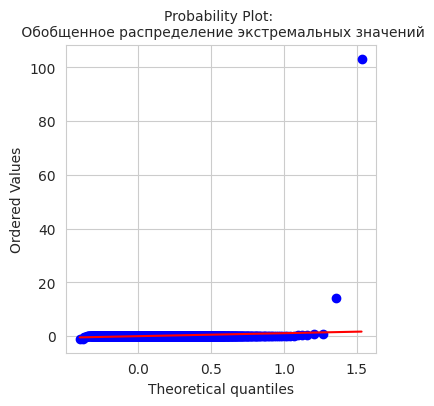

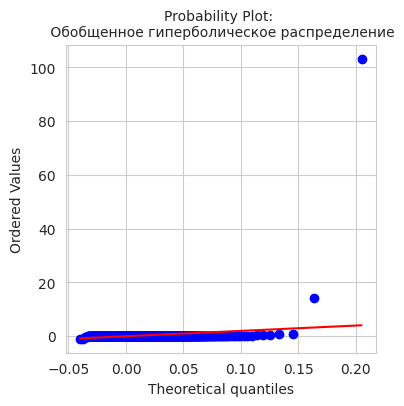

In [ ]:
dollar.full_info()

### Курс евро

In [ ]:
euro = FinancialInstrument(df=df_price, name='EUR/RUB')

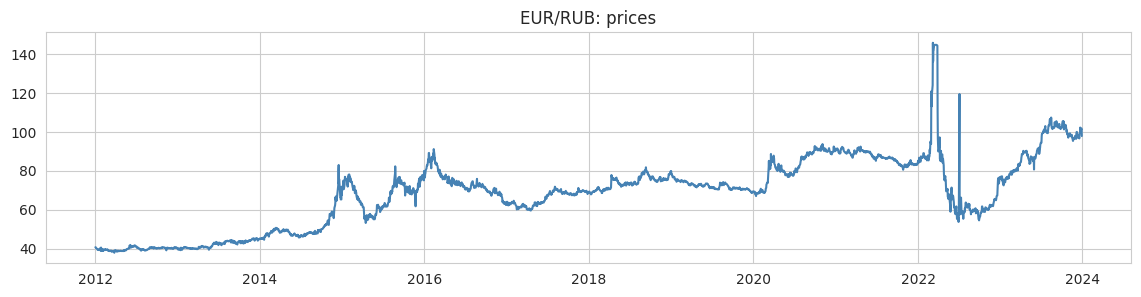

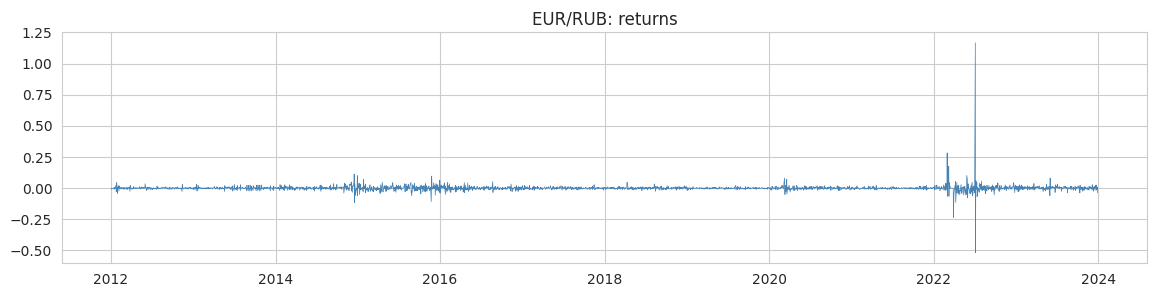

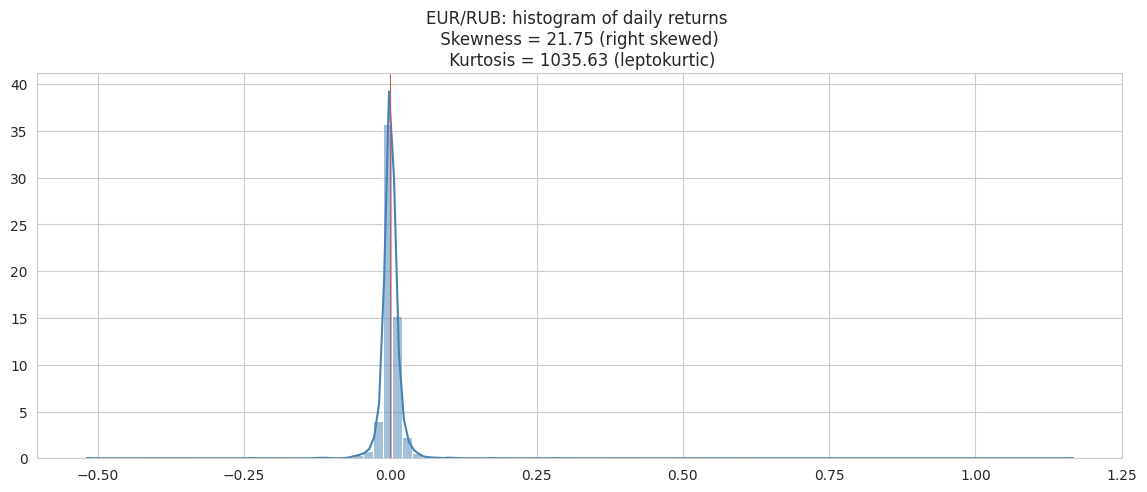

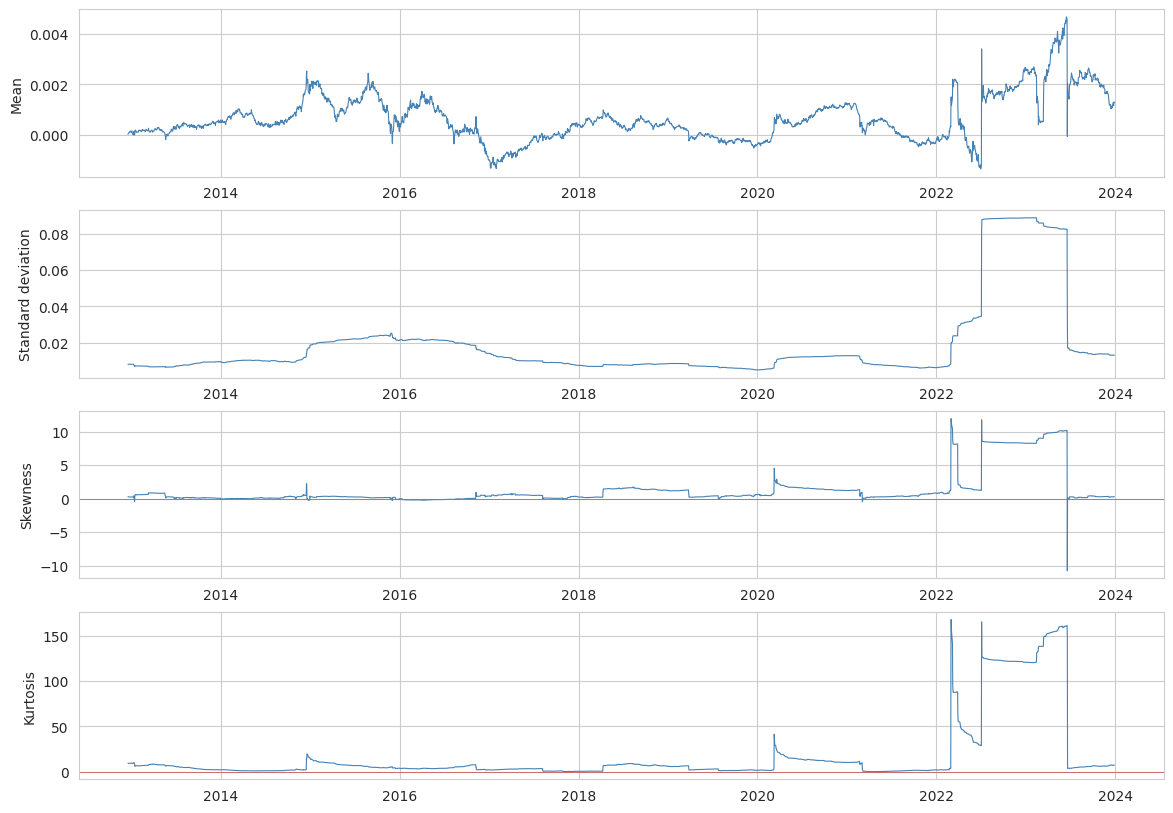



Stationarity test
ADF test: the series is stationary.
KPSS test: the series is stationary.


Ljung-Box test 
         lb_stat     lb_pvalue comment
1    212.589363  3.740729e-48        
5    238.817236  1.376758e-49        
25   288.107023  1.448799e-46        
50   320.644040  3.715677e-41        
250  573.546343  1.806652e-27        




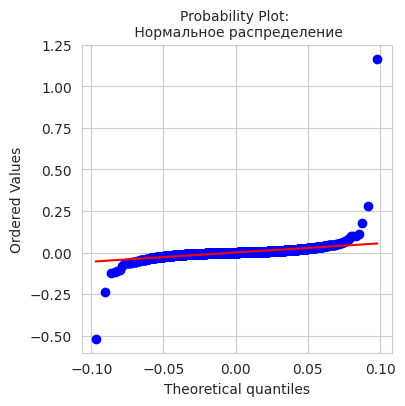

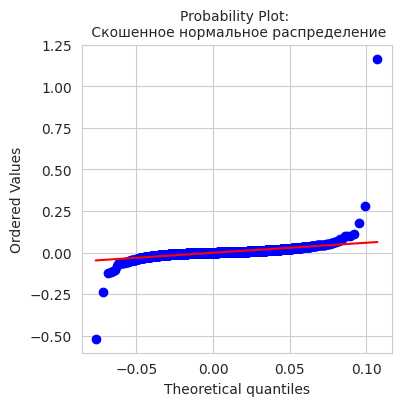

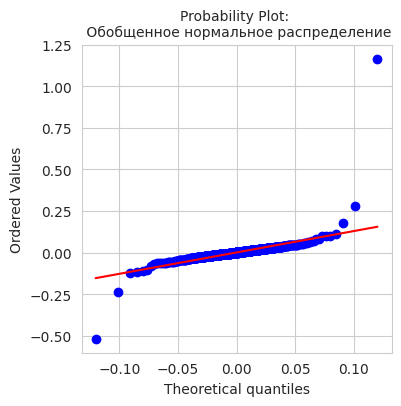

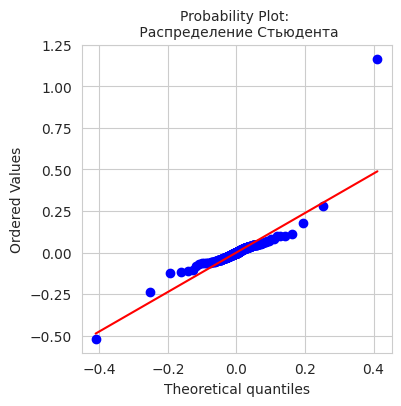

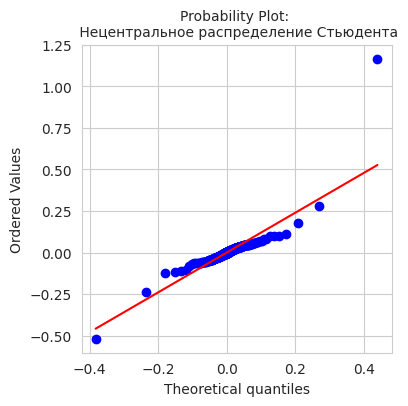

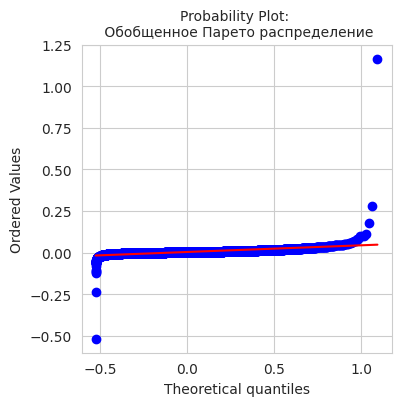

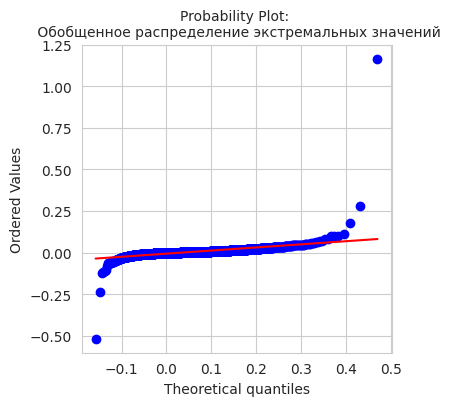

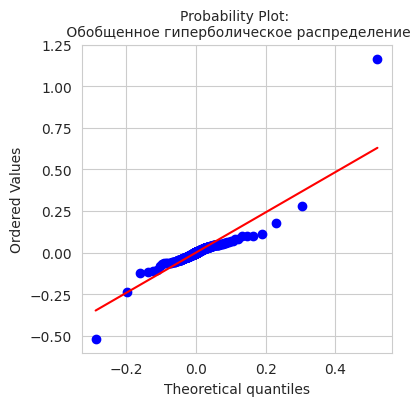

In [ ]:
euro.full_info()

### Сбербанк

In [ ]:
stock_sber = FinancialInstrument(df=df_price, name='Сбербанк')

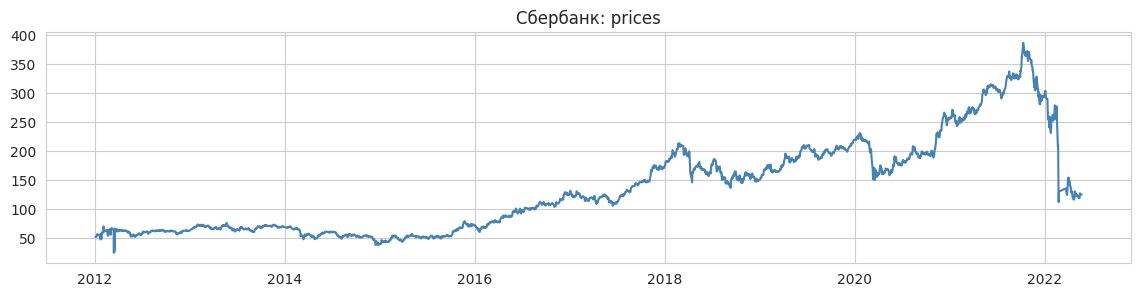

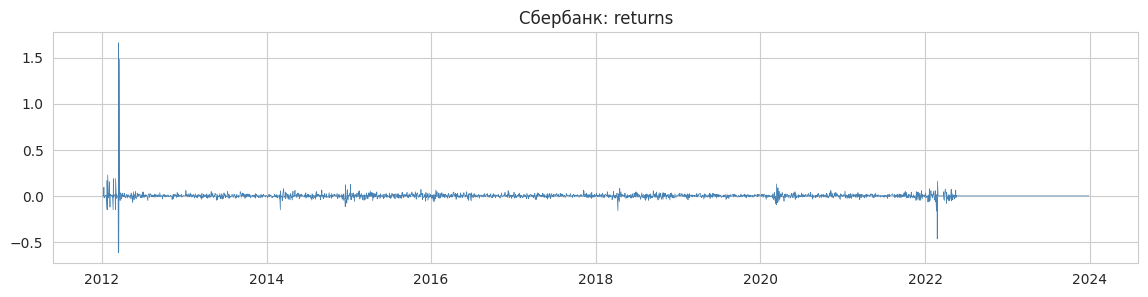

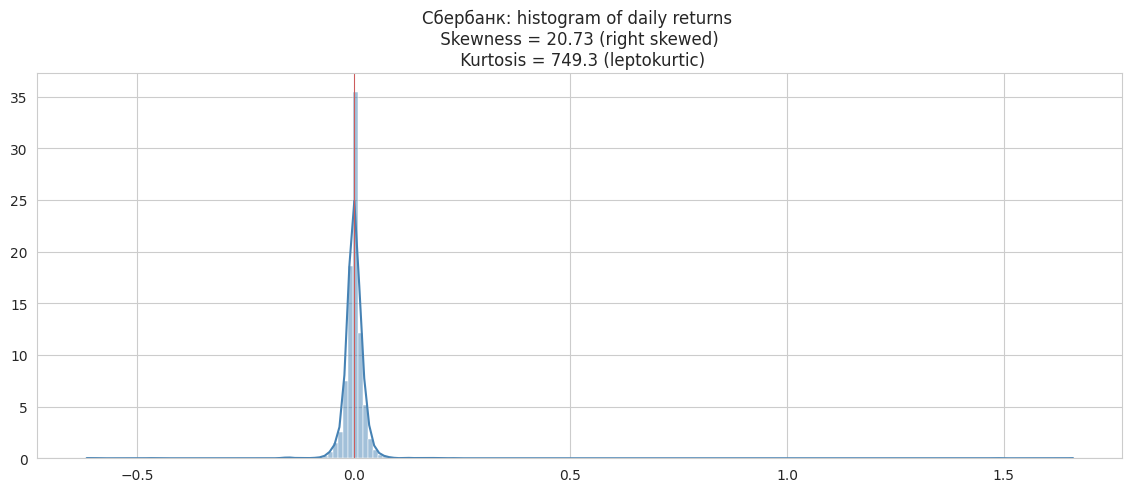

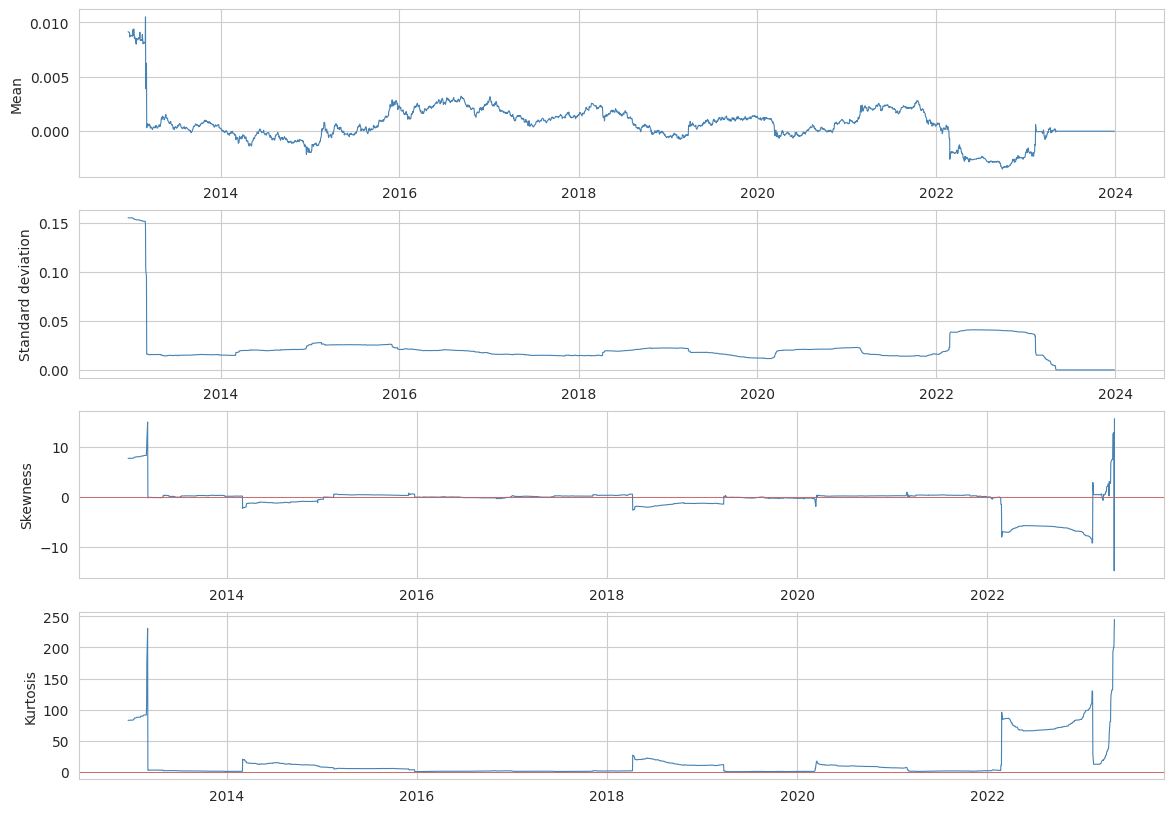



Stationarity test
ADF test: the series is stationary.
KPSS test: the series is not stationary.


Ljung-Box test 
          lb_stat      lb_pvalue comment
1     575.013345  4.558141e-127        
5    1065.566100  3.825365e-228        
25   1129.735045  1.589392e-222        
50   1199.652094  2.491509e-218        
250  1219.439059  3.012712e-127        




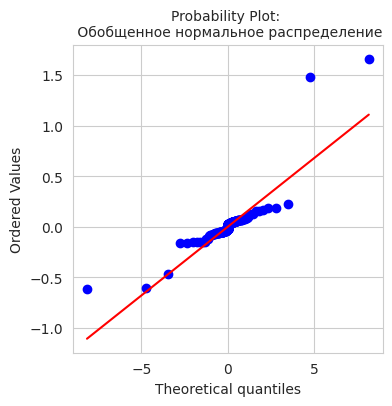

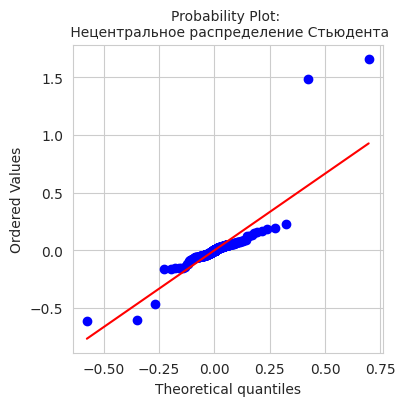

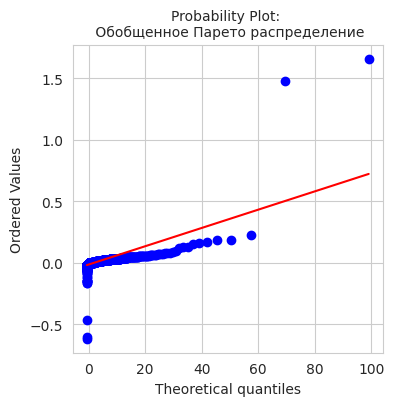

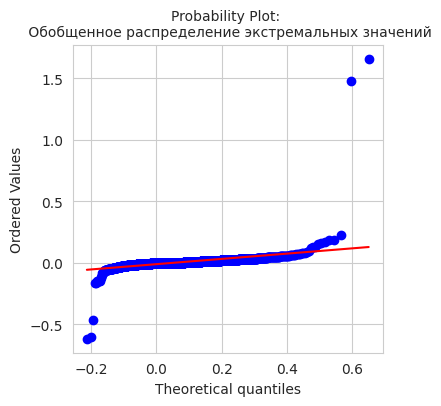

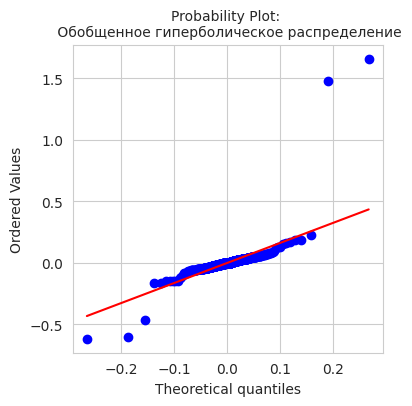

Данного распределения нет в списке дступных.


In [ ]:
stock_sber.full_info(bins=200,
                     dist_list=['GGD', 'nct', 'GPD', 'GEV', 'GHYP', 'beta'])

### Аэрофлот

In [ ]:
stock_aeroflot = FinancialInstrument(df=df_price, name='Аэрофлот')

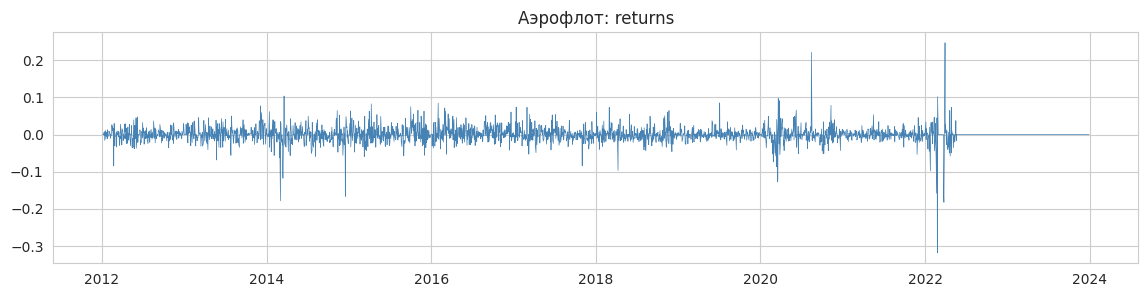

In [ ]:
stock_aeroflot.returns_dynamics()

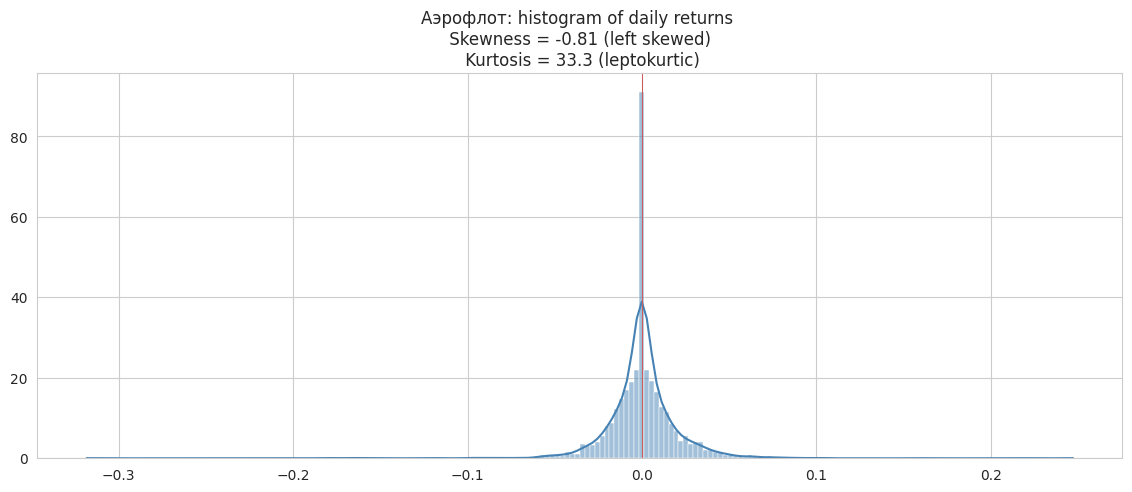

In [ ]:
stock_aeroflot.histogram(bins=200)

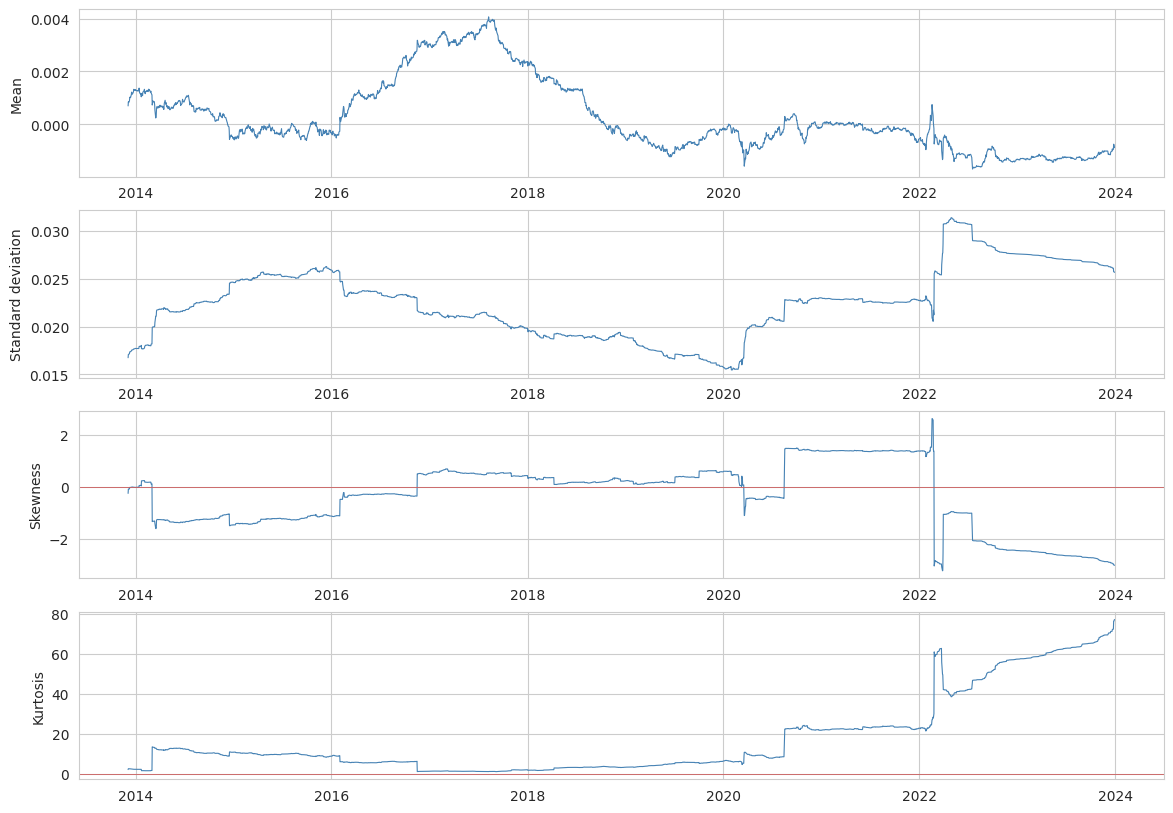

In [ ]:
stock_aeroflot.get_moving_dynamic(window_size=500)

In [ ]:
stock_aeroflot.stationarity_test()

Stationarity test
ADF test: the series is stationary.
KPSS test: the series is stationary.


In [ ]:
stock_aeroflot.ljungbox_test()

Ljung-Box test 
         lb_stat     lb_pvalue         comment
1     26.322881  2.888463e-07                
5     33.228126  3.390571e-06                
25    72.867422  1.430983e-06                
50   113.413084  7.895227e-07                
250  260.756197  3.071252e-01  p_value > 0.05


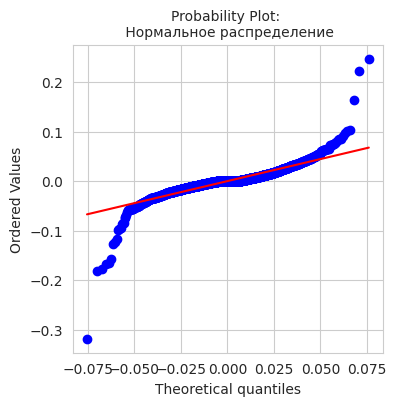

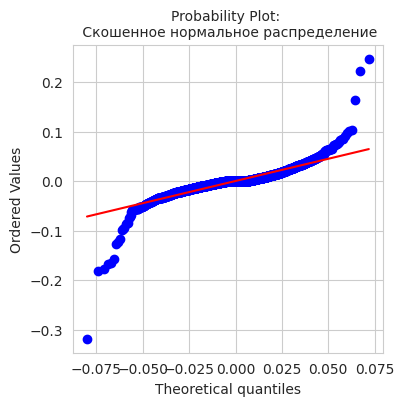

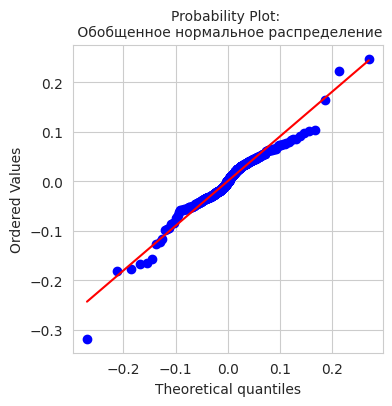

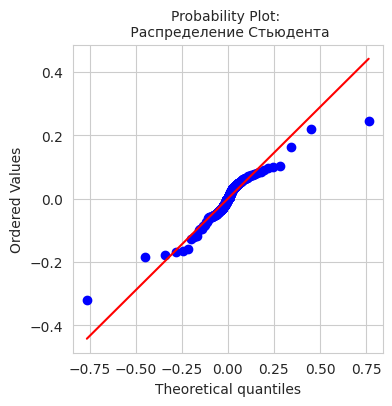

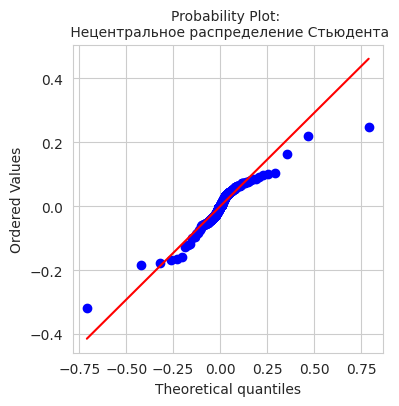

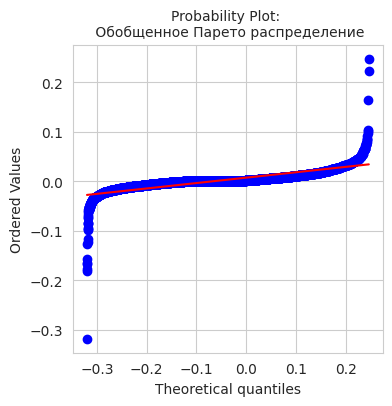

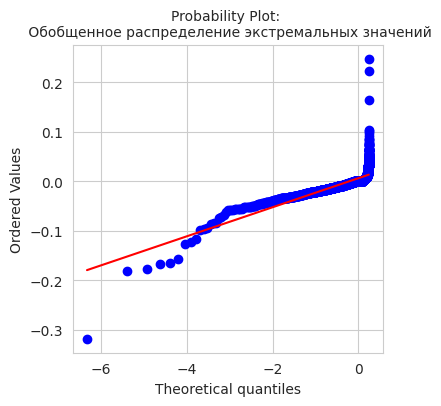

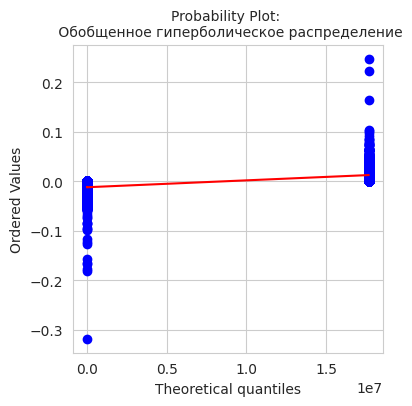

In [ ]:
stock_aeroflot.qq_plot()

In [ ]:
stock_aeroflot.goodness_of_fit_test(dist_list=['nct'], test_type='ks')

Goodness-of-Fit test
Нецентральное распределение Стьюдента: p_value = 0.0001


